In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing 

In [2]:
data = pd.read_csv('/kaggle/input/car-accident-dataset/Road Accident Data.csv')
data

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Carriageway_Hazards,...,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,NaN,...,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,NaN,...,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307968,201091NM01760,2/18/2022,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.374005,Daylight,Highland,NaN,...,2,1,Northern,Dry,Single carriageway,60,7:00,Rural,Fine no high winds,Car
307969,201091NM01881,2/21/2022,Sunday,Data missing or out of range,Not at junction or within 20 metres,Slight,57.232273,Darkness - no lighting,Highland,NaN,...,1,1,Northern,Frost or ice,Single carriageway,60,3:00,Rural,Fine no high winds,Car
307970,201091NM01935,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Slight,57.585044,Daylight,Highland,NaN,...,1,3,Northern,Frost or ice,Single carriageway,30,9:38,Rural,Fine no high winds,Car
307971,201091NM01964,2/23/2022,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,57.214898,Darkness - no lighting,Highland,NaN,...,1,2,Northern,Wet or damp,Single carriageway,60,18:25,Rural,Fine no high winds,Motorcycle over 500cc


In [3]:
data.shape

(307973, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         5424 non-null    object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [5]:
data.isnull().sum()

Accident_Index                     0
Accident Date                      0
Day_of_Week                        0
Junction_Control                   0
Junction_Detail                    0
Accident_Severity                  0
Latitude                           0
Light_Conditions                   0
Local_Authority_(District)         0
Carriageway_Hazards           302549
Longitude                          0
Number_of_Casualties               0
Number_of_Vehicles                 0
Police_Force                       0
Road_Surface_Conditions          317
Road_Type                       1534
Speed_limit                        0
Time                              17
Urban_or_Rural_Area                0
Weather_Conditions              6057
Vehicle_Type                       0
dtype: int64

In [6]:
data.drop(columns=["Carriageway_Hazards"], inplace=True)

In [7]:
data_clean = data.dropna()


In [8]:
data_clean.duplicated().sum()

1

In [9]:
duplicatedRows = data_clean[data_clean.duplicated()]
duplicatedRows

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
50483,2.01E+12,1/6/2021,Tuesday,Data missing or out of range,Not at junction or within 20 metres,Slight,53.648498,Daylight,Calderdale,-1.948984,1,1,West Yorkshire,Frost or ice,Single carriageway,50,16:35,Rural,Fine no high winds,Car


In [10]:
data_clean = data_clean.drop_duplicates()

In [11]:
data_clean.isnull().sum()

Accident_Index                0
Accident Date                 0
Day_of_Week                   0
Junction_Control              0
Junction_Detail               0
Accident_Severity             0
Latitude                      0
Light_Conditions              0
Local_Authority_(District)    0
Longitude                     0
Number_of_Casualties          0
Number_of_Vehicles            0
Police_Force                  0
Road_Surface_Conditions       0
Road_Type                     0
Speed_limit                   0
Time                          0
Urban_or_Rural_Area           0
Weather_Conditions            0
Vehicle_Type                  0
dtype: int64

In [12]:
duplicated_mask=data_clean.duplicated(subset=['Accident_Index'])
duplicated_location=data_clean[duplicated_mask]
duplicated_location

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
23281,2.01E+12,1/5/2021,Monday,Data missing or out of range,Not at junction or within 20 metres,Slight,54.537690,Daylight,Copeland,-3.537215,2,2,Cumbria,Frost or ice,Single carriageway,60,9:03,Rural,Fine no high winds,Car
23282,2.01E+12,1/1/2021,Thursday,Data missing or out of range,Not at junction or within 20 metres,Slight,54.177018,Darkness - no lighting,South Lakeland,-2.718047,1,1,Cumbria,Wet or damp,Single carriageway,60,2:10,Rural,Fine no high winds,Motorcycle over 500cc
23283,2.01E+12,1/5/2021,Monday,Give way or uncontrolled,T or staggered junction,Fatal,54.118163,Daylight,Barrow-in-Furness,-3.200954,1,2,Cumbria,Dry,Single carriageway,30,13:05,Urban,Fine no high winds,Car
23284,2.01E+12,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Slight,54.157996,Daylight,Barrow-in-Furness,-3.181279,1,1,Cumbria,Dry,Single carriageway,30,16:00,Rural,Fine no high winds,Car
23285,2.01E+12,1/2/2021,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,54.160636,Daylight,South Lakeland,-3.121318,1,1,Cumbria,Dry,Single carriageway,30,12:35,Rural,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306222,2.01E+12,12/11/2022,Saturday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.532465,Darkness - lights lit,Bridgend,-3.667600,1,1,South Wales,Wet or damp,Single carriageway,30,17:05,Rural,Fine no high winds,Car
306223,2.01E+12,12/12/2022,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.512353,Daylight,Bridgend,-3.587602,1,2,South Wales,Wet or damp,Single carriageway,30,10:18,Urban,Fine no high winds,Car
306224,2.01E+12,11/26/2022,Friday,Data missing or out of range,Not at junction or within 20 metres,Slight,51.486706,Daylight,Cardiff,-3.177227,1,1,South Wales,Dry,Single carriageway,30,21:00,Urban,Fine no high winds,Car
306225,2.01E+12,10/9/2022,Saturday,Auto traffic signal,Other junction,Slight,51.626186,Daylight,Swansea,-3.941213,1,1,South Wales,Dry,Single carriageway,30,14:10,Urban,Fine no high winds,Car


In [13]:
data_clean['Day_of_Week'].value_counts()

Day_of_Week
Friday       49287
Wednesday    45331
Tuesday      45220
Thursday     44495
Monday       42855
Saturday     40546
Sunday       32760
Name: count, dtype: int64

# Data snalysis

In [14]:
scelected_column = ["Number_of_Casualties","Number_of_Vehicles","Speed_limit"] 
data_clean[scelected_column].describe().round(2)

,Number_of_Casualties,Number_of_Vehicles,Speed_limit
count,300494.00,300494.00,300494.00
mean,1.36,1.83,38.93
std,0.82,0.71,14.06
min,1.00,1.00,10.00
25%,1.00,1.00,30.00
50%,1.00,2.00,30.00
75%,1.00,2.00,50.00
max,48.00,32.00,70.00


In [15]:
pd.crosstab(data_clean['Number_of_Casualties'],data_clean['Speed_limit'])

Speed_limit,10,15,20,30,40,50,60,70
Number_of_Casualties,,,,,,,,
1,2,1,2420,156931,17702,6699,30755,14442
2,0,1,259,26968,5038,2167,9902,4761
3,0,0,68,6913,1505,729,3329,1567
4,0,0,28,2400,599,244,1297,693
5,0,0,12,819,194,99,473,283
6,0,0,1,288,71,32,195,122
7,0,0,0,96,21,12,58,49
8,0,0,0,38,17,8,19,18
9,0,0,0,18,4,4,6,12


<Axes: >

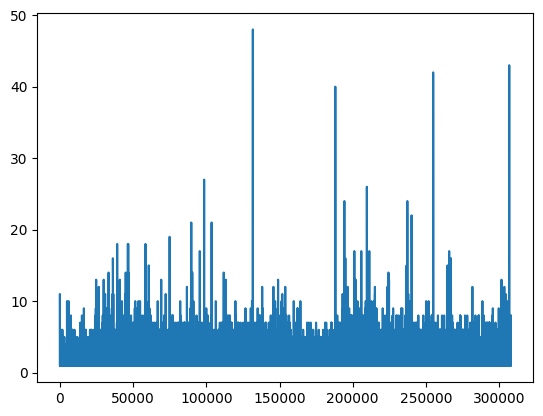

In [16]:
x= data_clean['Number_of_Casualties']
x.plot()

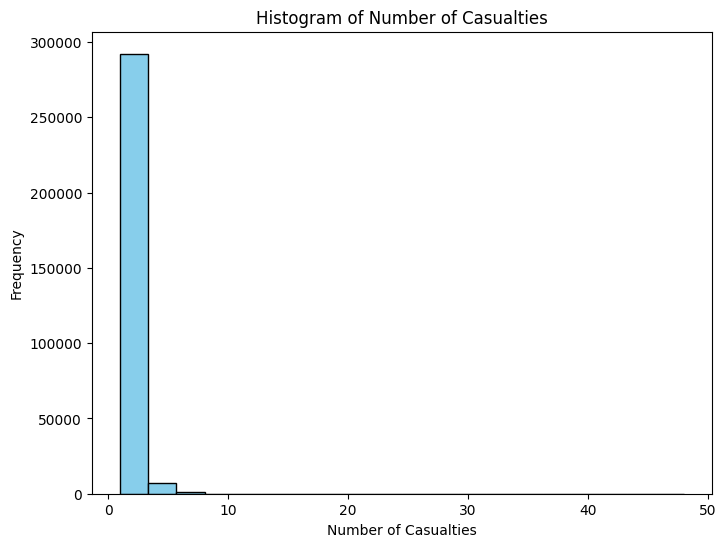

In [17]:

plt.figure(figsize=(8, 6))
plt.hist(data_clean["Number_of_Casualties"], bins=20, color='skyblue', edgecolor='black')  # Corrected parameter name
plt.xlabel('Number of Casualties')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Casualties')
plt.show()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'T or staggered junction'),
  Text(1, 0, 'Crossroads'),
  Text(2, 0, 'Not at junction or within 20 metres'),
  Text(3, 0, 'Roundabout'),
  Text(4, 0, 'Mini-roundabout'),
  Text(5, 0, 'More than 4 arms (not roundabout)'),
  Text(6, 0, 'Private drive or entrance'),
  Text(7, 0, 'Slip road'),
  Text(8, 0, 'Other junction')])

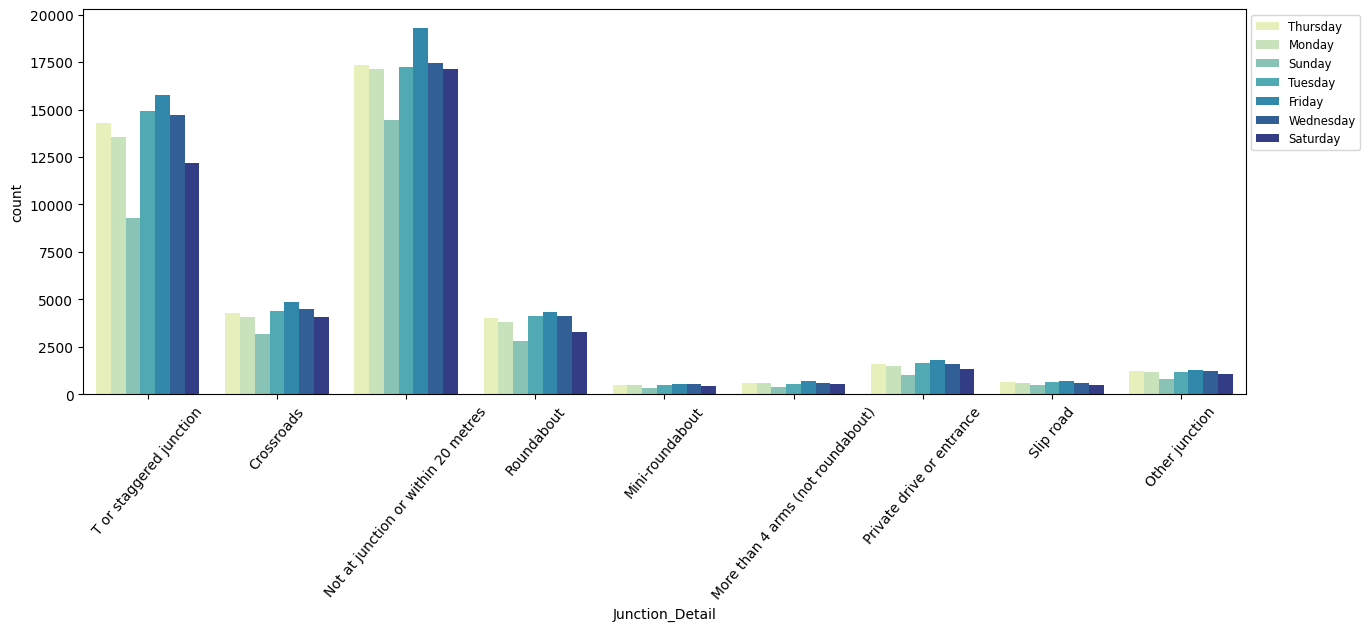

In [18]:
plt.figure(figsize=(15,5))
sns.countplot(data=data_clean, x= 'Junction_Detail' ,palette="YlGnBu", hue='Day_of_Week')
plt.legend(bbox_to_anchor=(1,1), loc='upper left', fontsize='small')
plt.xticks(rotation = 50)

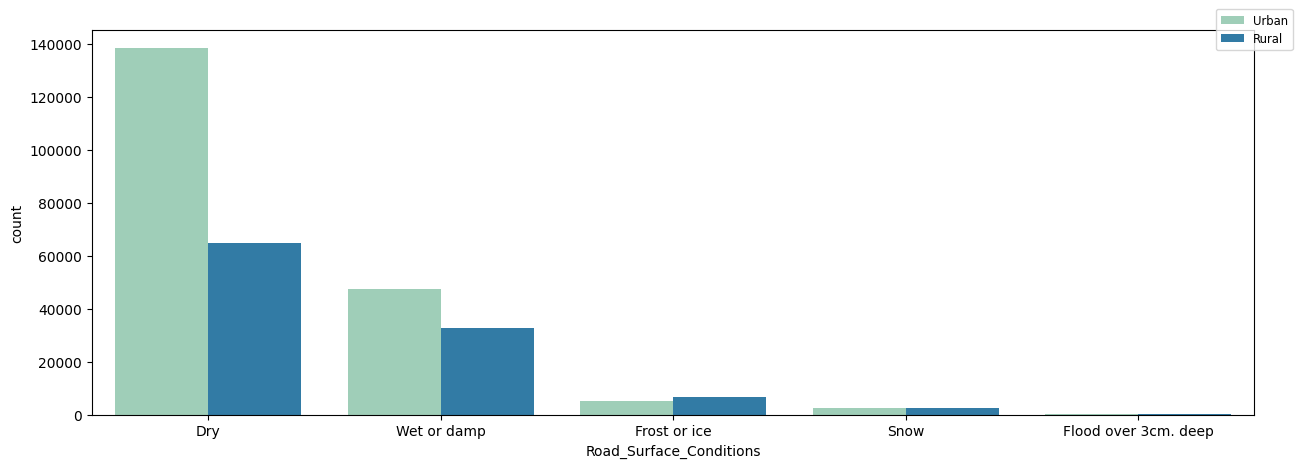

In [19]:
plt.figure(figsize=(15, 5))

# Create a count plot to visualize the distribution of accidents based on road surface conditions
sns.countplot(data=data_clean, x='Road_Surface_Conditions', palette="YlGnBu", hue='Urban_or_Rural_Area')

# Add a legend to the upper left corner outside the plot area
plt.legend(bbox_to_anchor=(1, 1), loc='center', fontsize='small')

In [20]:
data_clean.to_csv('car_accident_data_clean.csv')

# I will take this data to PowerBI to visualize it.